Exploratory Data Analysis

In [1]:
import kagglehub
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

/Users/joshua/Documents/ncsu/CSC_542/project/music-genre-classifier/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

genres = [
    "blues",
    "classical",
    "country",
    "disco",
    "hiphop",
    "jazz",
    "metal",
    "pop",
    "reggae",
    "rock",
]
sr = 22050

songs = {}
for genre in genres:
    songs[genre] = []
    for i in range(100):
        song, sr = librosa.load(
            f"{path}/Data/genres_original/{genre}/{genre}.000{i:02d}.wav"
        )
        songs[genre].append(song)

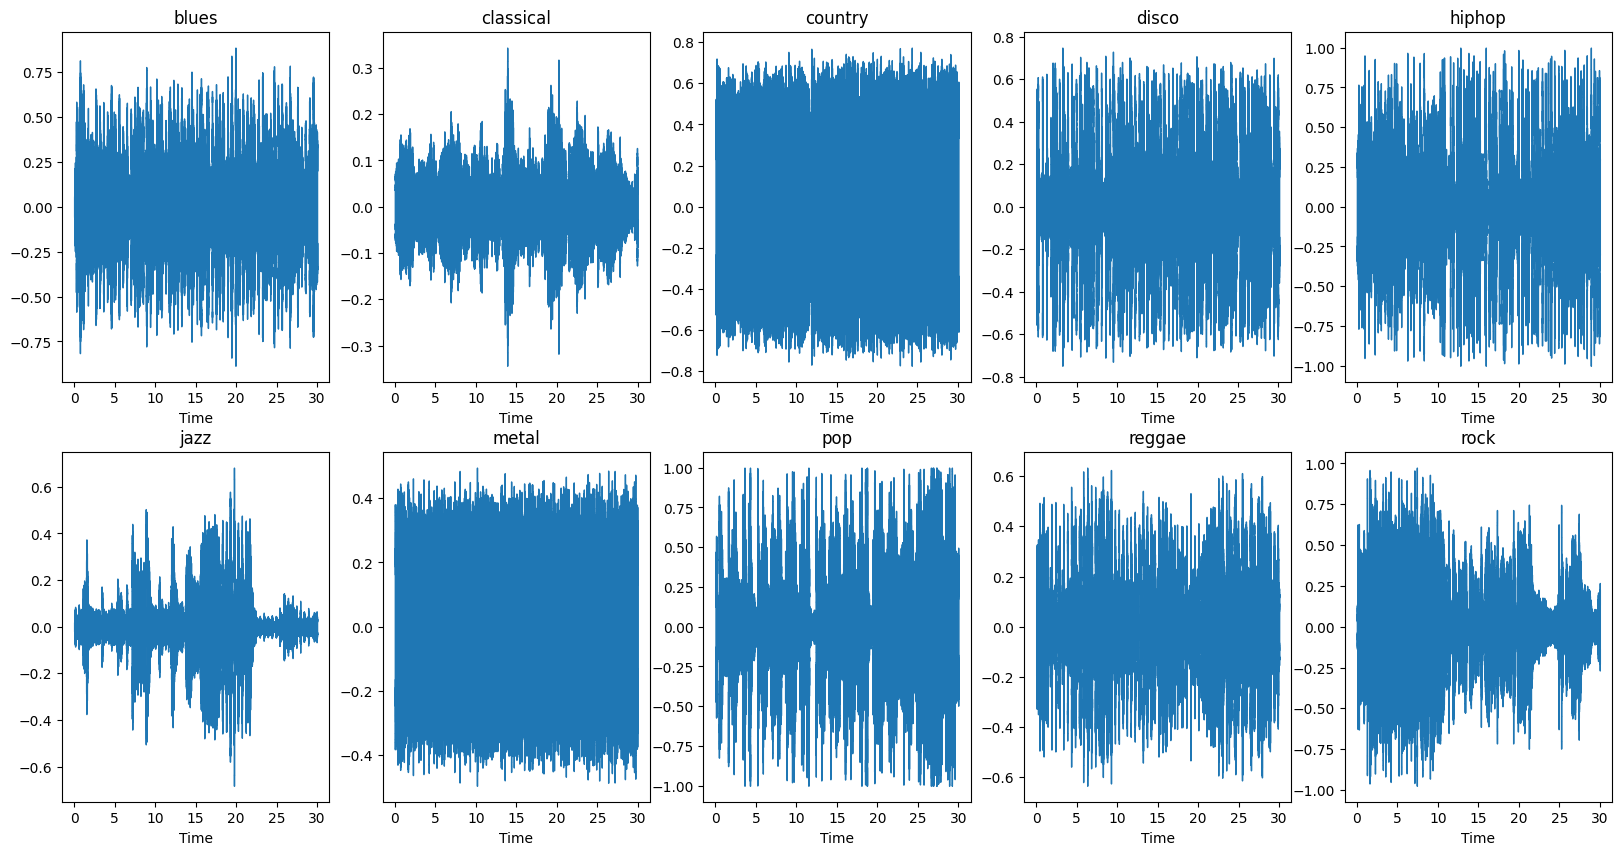

In [3]:
# plotting the song waveforms
plt.figure(figsize=(20, 10))
for i, genre in enumerate(genres):
    plt.subplot(2, 5, i + 1)
    librosa.display.waveshow(songs[genre][0], sr=sr)
    plt.title(genre)
plt.show()

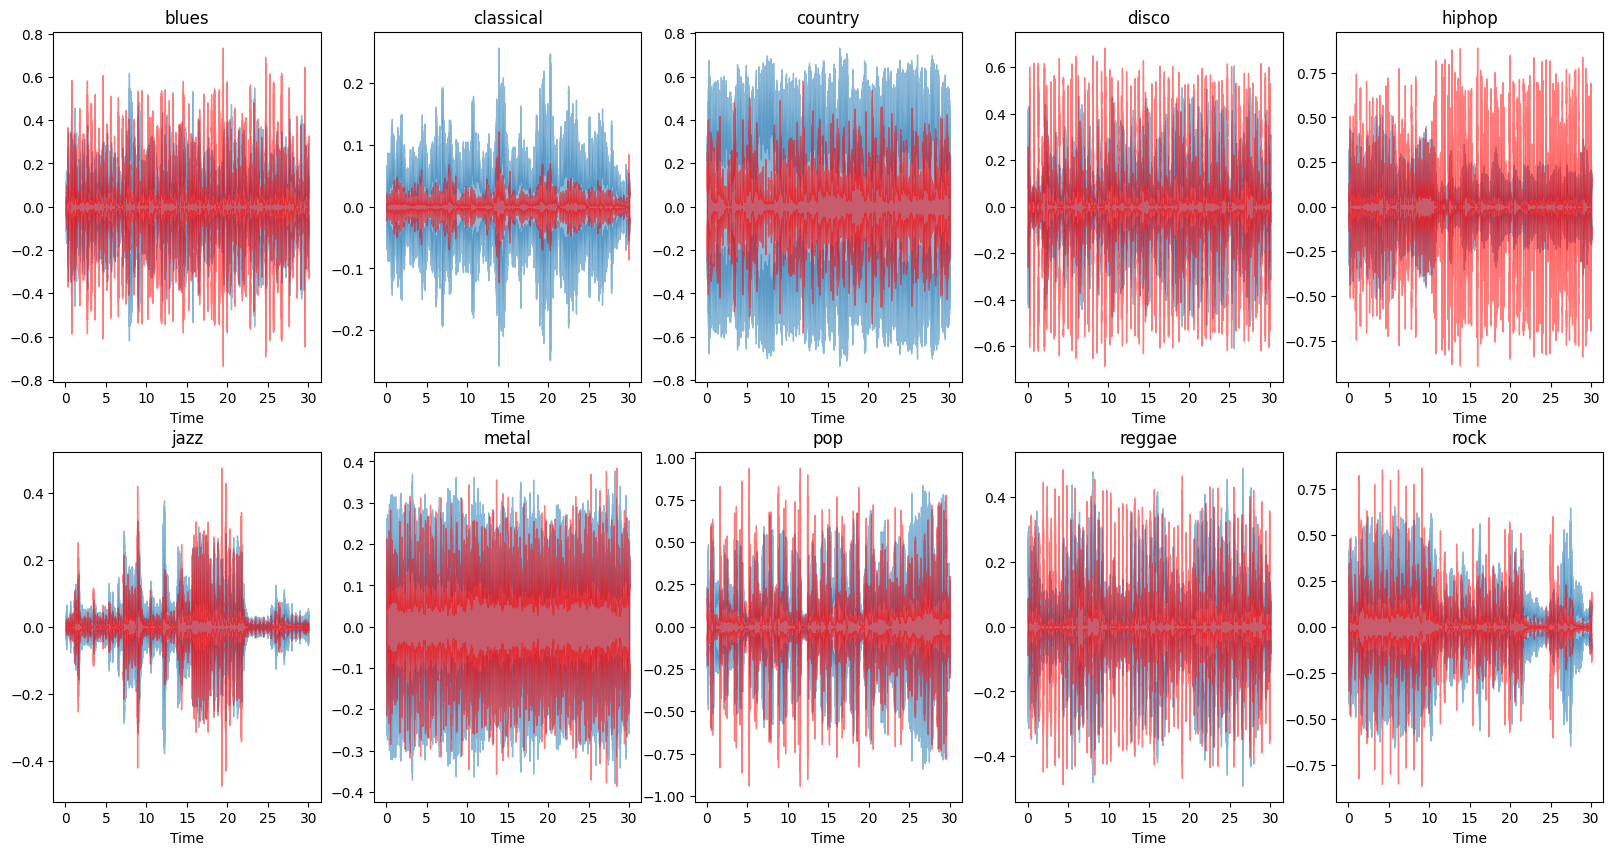

In [4]:
# plot the harmonic and percussive components
plt.figure(figsize=(20, 10))
for i, genre in enumerate(genres):
    plt.subplot(2, 5, i + 1)
    y_harmonic, y_percussive = librosa.effects.hpss(songs[genre][0])
    librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.5)
    librosa.display.waveshow(y_percussive, sr=sr, color="r", alpha=0.5)
    plt.title(genre)
plt.show()

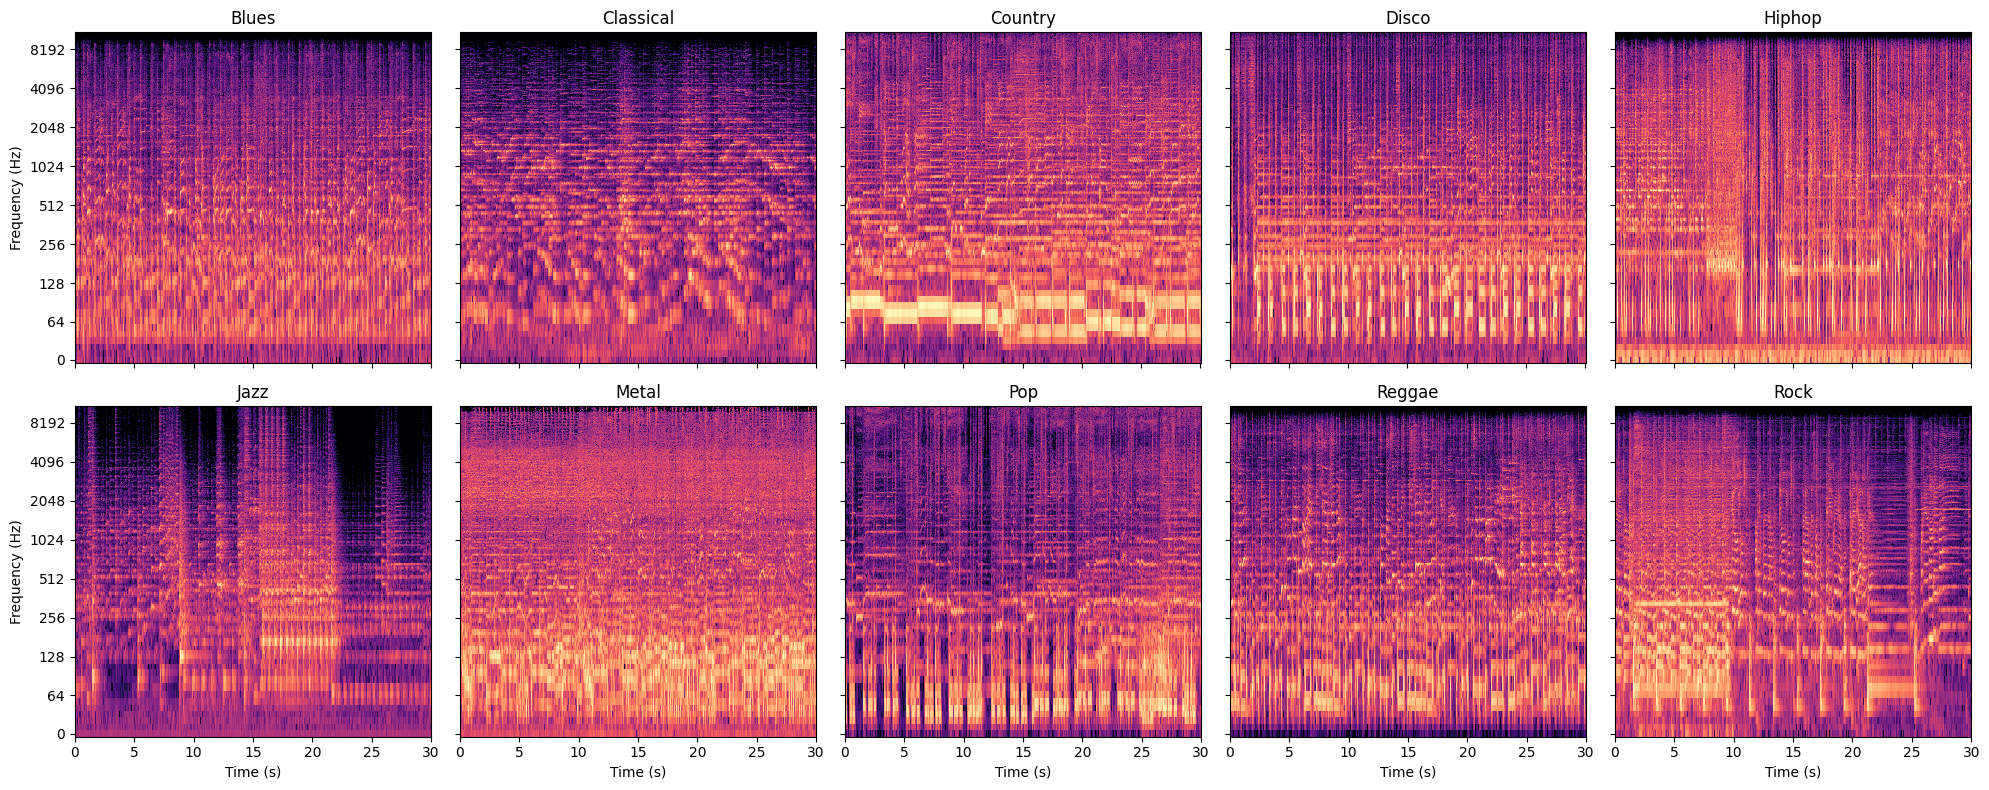

In [5]:
# plotting the STFT spectrogram
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, genre in enumerate(genres):
    D = librosa.stft(y=songs[genre][0], n_fft=2048, hop_length=512)
    D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    ax = axs[i // 5, i % 5]
    librosa.display.specshow(D_db, sr=sr, x_axis="time", y_axis="log", ax=ax)
    ax.set_title(genre.capitalize())
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")
    ax.label_outer()
plt.tight_layout()
plt.show() 

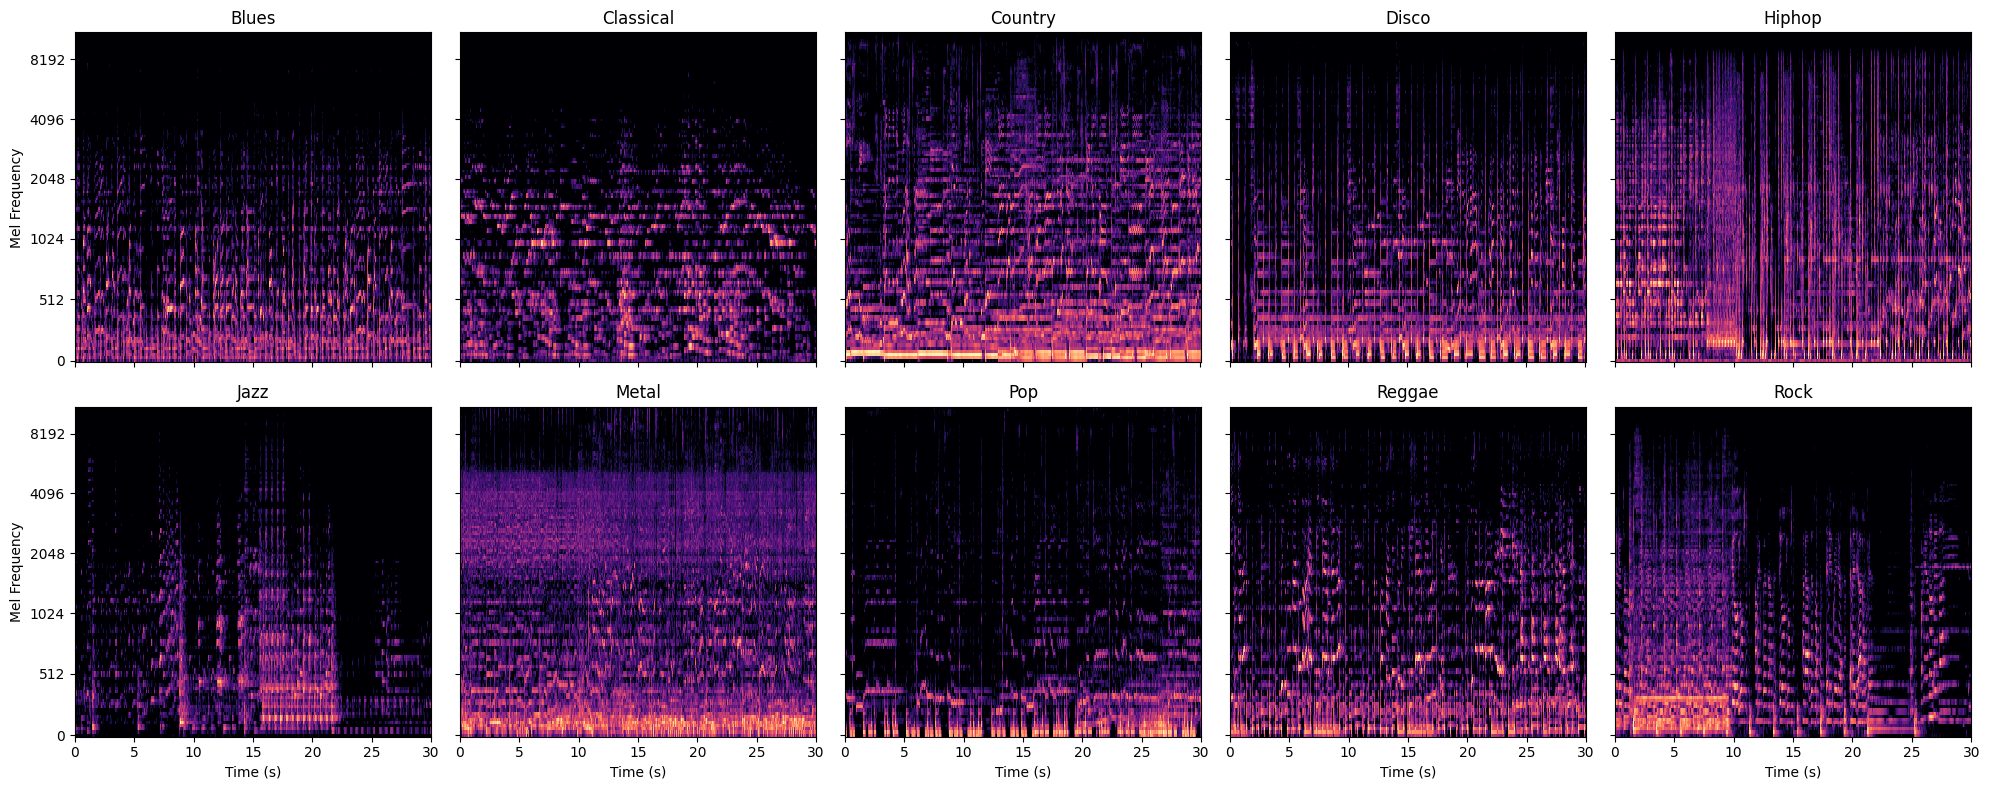

In [6]:
# plotting the Mel spectrogram
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, genre in enumerate(genres):
    mel_spec = librosa.feature.melspectrogram(
        y=songs[genre][0], sr=sr, n_fft=2048, hop_length=512, n_mels=128
    )
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
    ax = axs[i // 5, i % 5]
    librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel", ax=ax)
    ax.set_title(genre.capitalize())
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Mel Frequency")
    ax.label_outer()
plt.tight_layout()
plt.show()

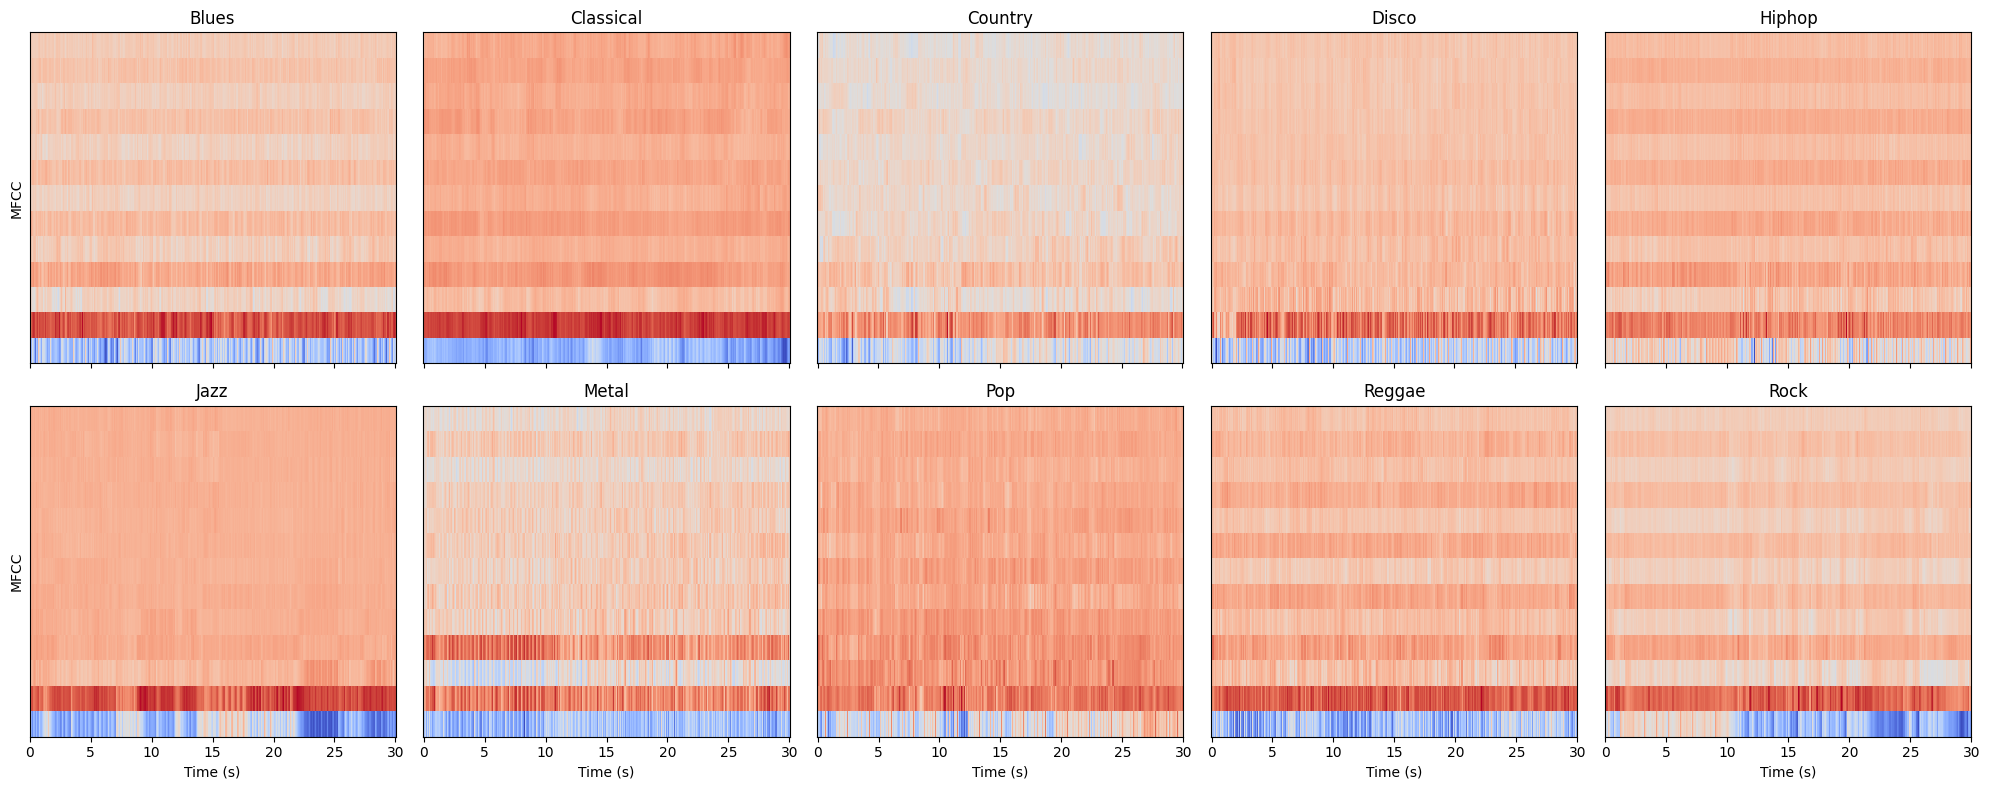

In [7]:
# plotting the MFCC spectrogram
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, genre in enumerate(genres):
    mfcc = librosa.feature.mfcc(y=songs[genre][0], sr=sr, n_mfcc=13, n_fft=2048, hop_length=512)
    ax = axs[i // 5, i % 5]
    librosa.display.specshow(mfcc, sr=sr, x_axis="time", ax=ax)
    ax.set_title(genre.capitalize())
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("MFCC")
    ax.label_outer()
plt.tight_layout()
plt.show()

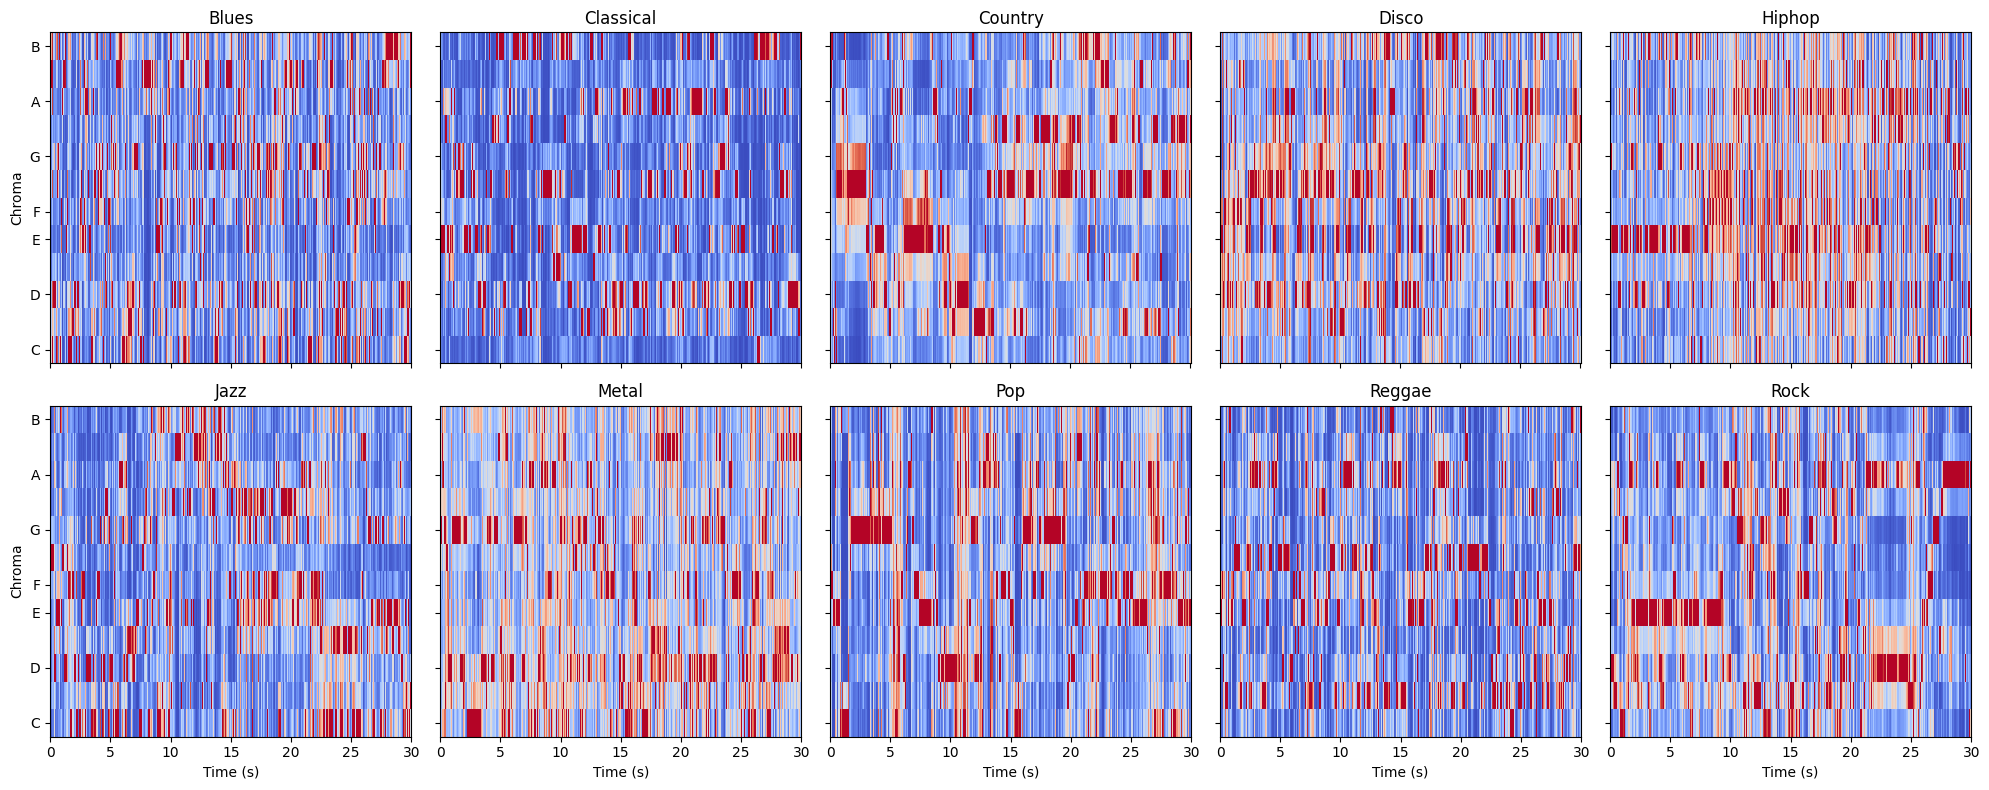

In [8]:
# plotting the chroma spectrogram
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, genre in enumerate(genres):
    chroma = librosa.feature.chroma_stft(y=songs[genre][0], sr=sr, n_fft=2048, hop_length=512)
    ax = axs[i // 5, i % 5]
    librosa.display.specshow(chroma, sr=sr, x_axis="time", y_axis="chroma", ax=ax, cmap='coolwarm')
    ax.set_title(genre.capitalize())
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Chroma")
    ax.label_outer()
plt.tight_layout()
plt.show()

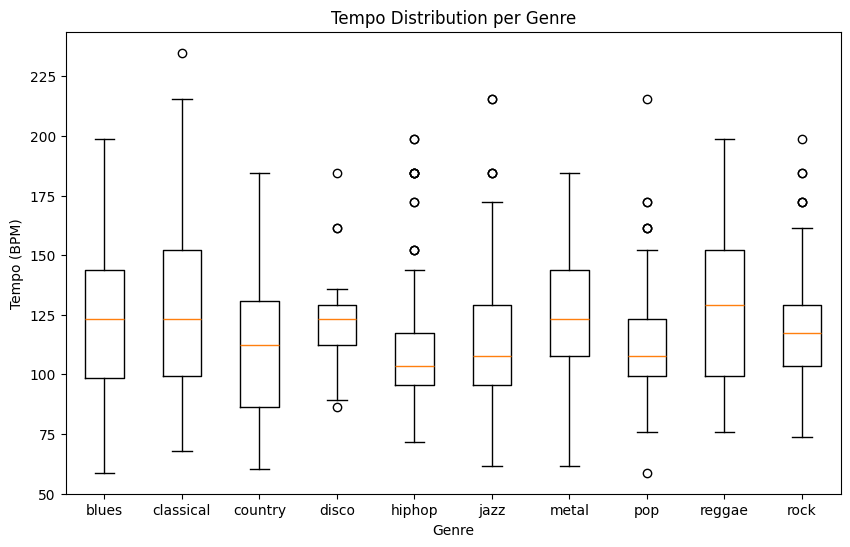

In [9]:
# plot the boxplot of song tempos per genre
genre_tempos = {genre: [] for genre in genres}
for genre in genres:
    for i in range(100):
        tempo, _ = librosa.beat.beat_track(y=songs[genre][i], sr=sr)
        genre_tempos[genre].append(float(tempo[0]))

plt.figure(figsize=(10, 6))
plt.boxplot(genre_tempos.values(), tick_labels=genre_tempos.keys())
plt.xlabel("Genre")
plt.ylabel("Tempo (BPM)")
plt.title("Tempo Distribution per Genre")
plt.show()

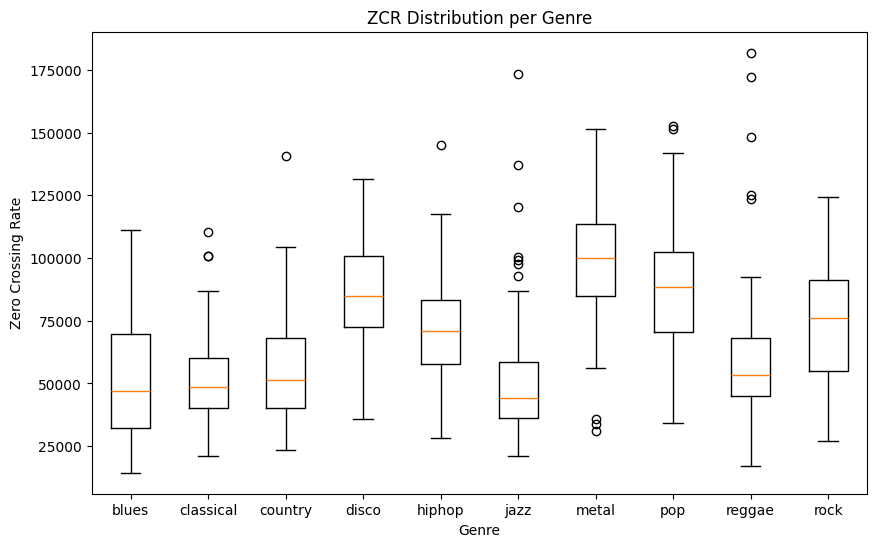

In [10]:
# plot the boxplot of zero crossing rate per genre
genre_zcr = {genre: [] for genre in genres}
for genre in genres:
    for i in range(100):
        zcr = librosa.zero_crossings(y=songs[genre][i], pad=False)
        genre_zcr[genre].append(sum(zcr))

plt.figure(figsize=(10, 6))
plt.boxplot(genre_zcr.values(), tick_labels=genre_zcr.keys())
plt.xlabel("Genre")
plt.ylabel("Zero Crossing Rate")
plt.title("ZCR Distribution per Genre")
plt.show()